In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools

In [405]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Sopprimi i RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [406]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d')
dati

,Timestamp,Price
0,2014-09-17,355.96
1,2014-09-18,328.54
2,2014-09-19,307.76
3,2014-09-20,318.76
4,2014-09-21,310.63
...,...,...
3503,2024-04-20,59876.71
3504,2024-04-21,60956.07
3505,2024-04-22,60919.24
3506,2024-04-23,62729.30


In [407]:
# dati = pd.read_csv('Bitcoin (€) da yfinance dal 06-05-2022 alle 21 al 05-05-2024 alle 19 con granularità oraria.csv')
# dati = dati[['Datetime', 'Close']]
# dati = dati.rename(columns = {'Datetime':'Timestamp', 'Close': 'Price'})
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
# dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d %H')
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d %H')
# dati

In [408]:
data_inizio = '2022-01-01'
data_fine = '2022-03-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,Price
0,2022-01-01,41926.34
1,2022-01-02,41629.80
2,2022-01-03,41105.72
3,2022-01-04,40677.88
4,2022-01-05,38520.27
5,2022-01-06,38203.51
6,2022-01-07,36575.90
7,2022-01-08,36734.38
8,2022-01-09,36914.77
9,2022-01-10,36912.20


In [409]:
# data_inizio = '2023-06-01 00'
# data_fine = '2023-12-01 00'
# indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
# indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
# dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
# dati

### Eventuale cambio dati

In [410]:
def calcola_prezzo(t):
    return dati['Price'][t] #1000 - t + 100 * math.sin(2*math.pi * t / 4)

In [411]:
dati['Price'] = dati.index.map(calcola_prezzo)
dati

,Timestamp,Price
0,2022-01-01,41926.34
1,2022-01-02,41629.80
2,2022-01-03,41105.72
3,2022-01-04,40677.88
4,2022-01-05,38520.27
5,2022-01-06,38203.51
6,2022-01-07,36575.90
7,2022-01-08,36734.38
8,2022-01-09,36914.77
9,2022-01-10,36912.20


In [412]:
def trading_strategy(dati, perc_acquisto, perc_vendita, soglia_vendita, liquidita_iniziale, bitcoin_iniziali):
    transazioni = []
    liquidita = liquidita_iniziale
    bitcoin = bitcoin_iniziali
    ultima_azione = '-'
    ultimo_prezzo_acquisto = None
    
    for i in range(1, len(dati)):
        data = dati['Timestamp'][i]
        prezzo_oggi = dati['Price'][i]
        prezzo_ieri = dati['Price'][i-1]
        
        liquidita_precedente = liquidita
        bitcoin_precedenti = bitcoin
        
        if prezzo_oggi < prezzo_ieri:
            # Acquisto
            quantita_euro = liquidita * perc_acquisto
            quantita_bitcoin = quantita_euro / prezzo_oggi
            liquidita -= quantita_euro
            bitcoin += quantita_bitcoin
            if quantita_euro != 0:
                azione = 'Acquisto'
                ultima_azione = azione
                ultimo_prezzo_acquisto = prezzo_oggi
            else:
                azione = '-'
        elif prezzo_oggi > prezzo_ieri:
            # Vendita
            if ultimo_prezzo_acquisto is not None and prezzo_oggi > ultimo_prezzo_acquisto * (1 + soglia_vendita):
                quantita_bitcoin = bitcoin * perc_vendita
                quantita_euro = quantita_bitcoin * prezzo_oggi
                liquidita += quantita_euro
                bitcoin -= quantita_bitcoin
                if quantita_bitcoin != 0:
                    azione = 'Vendita'
                    ultima_azione = azione
            else:
                quantita_euro = 0
                quantita_bitcoin = 0
                azione = '-'
        else:
            # Nessuna azione
            quantita_euro = 0
            quantita_bitcoin = 0
            azione = '-'
        
        valore_totale = liquidita + bitcoin * prezzo_oggi
        
        transazioni.append({
            'data': data,
            'prezzo': prezzo_oggi,
            'azione': azione,
            'ultima_azione': ultima_azione,
            'percentuale_liquidità_usata': round((quantita_euro / liquidita_precedente), 2) if azione == "Acquisto" and liquidita_precedente != 0 else 0,
            'percentuale_token_venduti': round((quantita_bitcoin / bitcoin_precedenti), 2) if azione == "Vendita" and bitcoin_precedenti != 0 else 0,
            'quantità_euro': round(quantita_euro, 2),
            'quantità_bitcoin': round(quantita_bitcoin, 6),
            'liquidità_posseduta': round(liquidita, 2),
            'bitcoin_posseduti': round(bitcoin, 6),
            'valore_totale_portafoglio': valore_totale
        })
        
        ultima_azione = azione
    
    return pd.DataFrame(transazioni)

In [413]:
liquidita_iniziale = 1000
bitcoin_iniziali = 0
perc_acquisto = 1
perc_vendita = 1
soglia_vendita = 0

df_transazioni = trading_strategy(dati, perc_acquisto, perc_vendita, soglia_vendita, liquidita_iniziale, bitcoin_iniziali)
df_transazioni

,data,prezzo,azione,ultima_azione,percentuale_liquidità_usata,percentuale_token_venduti,quantità_euro,quantità_bitcoin,liquidità_posseduta,bitcoin_posseduti,valore_totale_portafoglio
0,2022-01-02,41629.80,Acquisto,Acquisto,1.00,0,1000,0.02,0,0.02,1000.00
1,2022-01-03,41105.72,-,Acquisto,0.00,0,0,0.00,0,0.02,987.41
2,2022-01-04,40677.88,-,-,0.00,0,0,0.00,0,0.02,977.13
3,2022-01-05,38520.27,-,-,0.00,0,0,0.00,0,0.02,925.31
4,2022-01-06,38203.51,-,-,0.00,0,0,0.00,0,0.02,917.70
5,2022-01-07,36575.90,-,-,0.00,0,0,0.00,0,0.02,878.60
6,2022-01-08,36734.38,-,-,0.00,0,0,0.00,0,0.02,882.41
7,2022-01-09,36914.77,-,-,0.00,0,0,0.00,0,0.02,886.74
8,2022-01-10,36912.20,-,-,0.00,0,0,0.00,0,0.02,886.68
9,2022-01-11,37599.60,-,-,0.00,0,0,0.00,0,0.02,903.19


In [414]:
df_transazioni['valore_totale_portafoglio'].diff()

0       NaN
1    -12.59
2    -10.28
3    -51.83
4     -7.61
5    -39.10
6      3.81
7      4.33
8     -0.06
9     16.51
10    19.61
11   -29.80
12    13.95
13     1.63
14    -0.57
15   -18.54
16     9.01
17   -14.48
18   -20.25
19   -91.81
20   -30.22
21    26.64
22     9.19
23     7.78
24     2.17
25    12.99
26    13.57
27     7.62
28    -4.96
29     6.50
30     2.34
31   -40.00
32    -5.10
33    90.26
34    -1.25
35    19.96
36    30.98
37     7.55
38     4.59
39   -15.50
40   -19.60
41    -3.40
42    -2.11
43    12.88
44    38.16
45   -14.44
46   -71.60
47    -7.62
48     1.93
49   -35.51
50   -28.23
51    24.31
52   -19.38
53    30.38
54    12.72
55    -2.18
56   -23.15
57   115.00
58    31.87
Name: valore_totale_portafoglio, dtype: float64

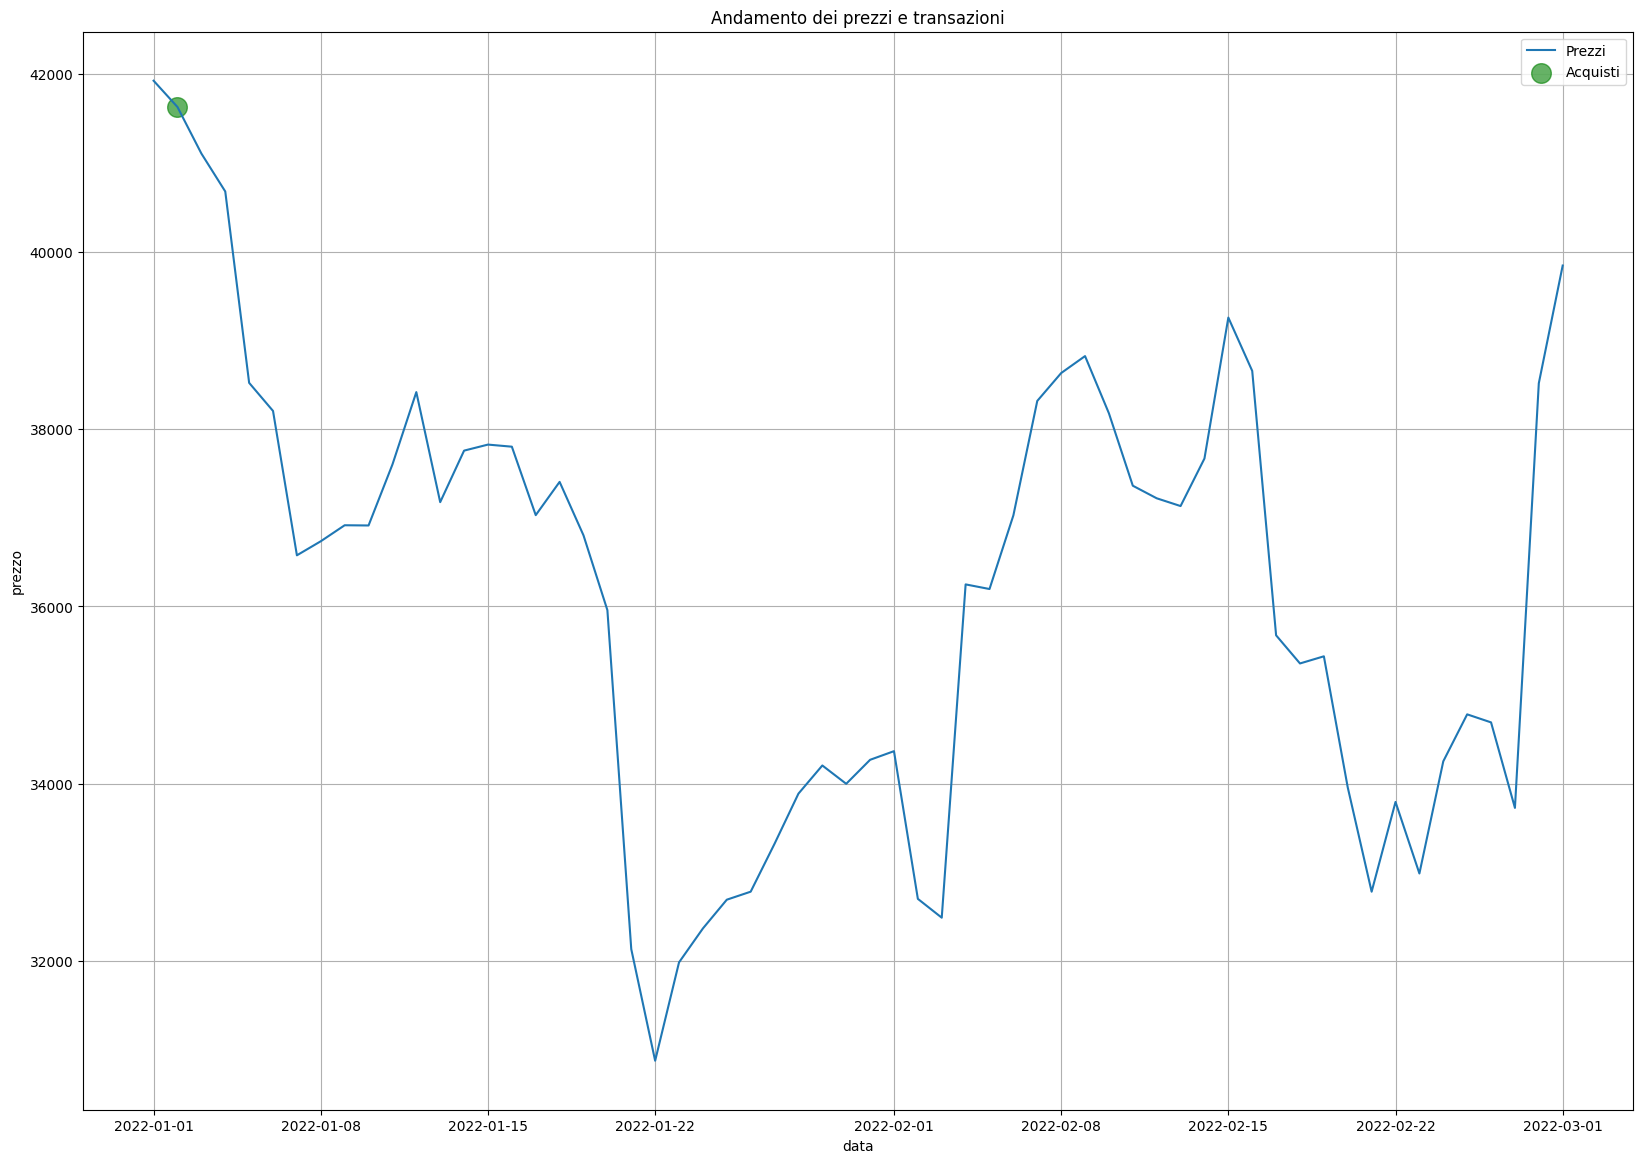

In [415]:
etichette = False

# Preparazione dei dati per il grafico
acquisti = df_transazioni[df_transazioni['azione'].isin(['Acquisto'])]
vendite = df_transazioni[df_transazioni['azione'].isin(['Vendita'])]

# Calcolo delle dimensioni dei punti
max_acquisto = acquisti['quantità_euro'].max()
max_vendita = vendite['quantità_euro'].max()

def calcola_dimensione(quantita, max_quantita, min_size=20, max_size=200):
    return min_size + (max_size - min_size) * (quantita / max_quantita)

dimensioni_acquisti = acquisti['quantità_euro'].apply(lambda x: calcola_dimensione(x, max_acquisto))
dimensioni_vendite = vendite['quantità_euro'].apply(lambda x: calcola_dimensione(x, max_vendita))

# Creazione del grafico
plt.figure(figsize=(20, 14))
plt.grid()
plt.plot(dati['Timestamp'], dati['Price'], label='Prezzi')
if not acquisti.empty:
    plt.scatter(acquisti['data'], acquisti['prezzo'], s=dimensioni_acquisti, color='green', alpha=0.6, label='Acquisti')
    if etichette:
        for i, row in acquisti.iterrows():
            plt.text(row['data'], row['prezzo'], f"+{row['quantità_euro']:.2f} €", 
                     color='black', ha='center', va='bottom')
if not vendite.empty:
    plt.scatter(vendite['data'], vendite['prezzo'], s=dimensioni_vendite, color='red', alpha=0.6, label='Vendite')
    if etichette:
        for i, row in vendite.iterrows():
            plt.text(row['data'], row['prezzo'], f"-{row['quantità_euro']:.2f} €", 
                     color='black', ha='center', va='top')

plt.xlabel('data')
plt.ylabel('prezzo')
plt.title('Andamento dei prezzi e transazioni')
plt.legend()
plt.show()

In [416]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi, min_acquisto, min_vendita, perc_commissione_acquisto, perc_commissione_vendita):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
            bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
            bitcoin += bitcoin_acquistati
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i + 1] and comprato and bitcoin * lista_prezzi[i] >= min_vendita:
            capitale_vendita = bitcoin * lista_prezzi[i] * (1 - perc_commissione_vendita)
            capitale += capitale_vendita
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato and bitcoin * lista_prezzi.iloc[-1] >= min_vendita:
        capitale += bitcoin * lista_prezzi.iloc[-1] * (1 - perc_commissione_vendita)
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

In [417]:
rendimento_ideale, portafoglio_finale_ideale = calcola_rendimento_portafoglio_ideale(liquidita_iniziale, bitcoin_iniziali, dati['Price'], 0, 0, 0, 0)
print('Rendimento ideale:', rendimento_ideale)
print('Portafoglio finale ideale in euro:', portafoglio_finale_ideale)

Rendimento ideale: 1.9680175957673036
Portafoglio finale ideale in euro: 1968.0175957673036


In [418]:
valore_iniziale = df_transazioni['valore_totale_portafoglio'].iloc[0]
valore_finale = df_transazioni['valore_totale_portafoglio'].iloc[-1]
rendimento = valore_finale / valore_iniziale

In [419]:
print(f"Rendimento del portafoglio: {rendimento}")
print(f'Punteggio rendimento: {round(rendimento / rendimento_ideale *100, 2)}%')
print(f"Valore finale del portafoglio in euro: {df_transazioni['valore_totale_portafoglio'].iloc[-1]}")

Rendimento del portafoglio: 0.9570749582278845
Punteggio rendimento: 48.63%
Valore finale del portafoglio in euro: 957.0749582278846


In [420]:
# Colonna per tracciare il valore delle transazioni (profitto o perdita)
df_transazioni['transaction_value'] = 0.0

# Variabili per tracciare l'acquisto totale accumulato
total_quantity = 0  # Quantità complessiva acquistata
total_cost = 0  # Costo totale di acquisto

# Ciclo per aggiornare la colonna transaction_value
for i, row in df_transazioni.iterrows():
    if row['azione'] == 'Acquisto':
        # Accumula gli acquisti: aggiorna il costo totale e la quantità
        total_quantity += row['quantità_euro']
        total_cost += row['quantità_euro'] * row['prezzo']
    
    elif row['azione'] == 'Vendita':
        if total_quantity == 0:
            raise ValueError("Stai vendendo senza aver comprato nulla!")
        
        # Calcola il prezzo medio d'acquisto
        avg_Acquistorice = total_cost / total_quantity
        
        # Calcola il valore della vendita rispetto all'acquisto
        sale_value = row['quantità_euro'] * row['prezzo']
        purchase_cost = row['quantità_euro'] * avg_Acquistorice
        
        # Calcola il profitto/perdita per questa vendita
        profit_or_loss = sale_value - purchase_cost
        
        # Aggiorna la colonna transaction_value
        df_transazioni.at[i, 'transaction_value'] = profit_or_loss
        
        # Riduci la quantità e il costo totale in base a quanto hai venduto
        total_quantity -= row['quantità_euro']
        total_cost -= purchase_cost

# Mostra il DataFrame con il transaction_value
df_transazioni

,data,prezzo,azione,ultima_azione,percentuale_liquidità_usata,percentuale_token_venduti,quantità_euro,quantità_bitcoin,liquidità_posseduta,bitcoin_posseduti,valore_totale_portafoglio,transaction_value
0,2022-01-02,41629.80,Acquisto,Acquisto,1.00,0,1000,0.02,0,0.02,1000.00,0.00
1,2022-01-03,41105.72,-,Acquisto,0.00,0,0,0.00,0,0.02,987.41,0.00
2,2022-01-04,40677.88,-,-,0.00,0,0,0.00,0,0.02,977.13,0.00
3,2022-01-05,38520.27,-,-,0.00,0,0,0.00,0,0.02,925.31,0.00
4,2022-01-06,38203.51,-,-,0.00,0,0,0.00,0,0.02,917.70,0.00
5,2022-01-07,36575.90,-,-,0.00,0,0,0.00,0,0.02,878.60,0.00
6,2022-01-08,36734.38,-,-,0.00,0,0,0.00,0,0.02,882.41,0.00
7,2022-01-09,36914.77,-,-,0.00,0,0,0.00,0,0.02,886.74,0.00
8,2022-01-10,36912.20,-,-,0.00,0,0,0.00,0,0.02,886.68,0.00
9,2022-01-11,37599.60,-,-,0.00,0,0,0.00,0,0.02,903.19,0.00


In [421]:
def trading_statistics(df, commission_per_trade=0, financial_costs=0):
    """
    Calcola le statistiche di trading da un DataFrame di operazioni, includendo profitto/perdita e commissioni.
    
    Parametri:
    - df (DataFrame): Un DataFrame contenente almeno una colonna 'transaction_value' con i profitti o le perdite.
    - commission_per_trade (float): Commissione fissa per operazione (default: 0).
    - financial_costs (float): Costi finanziari aggiuntivi da includere (default: 0).

    Restituisce:
    - DataFrame con le statistiche di trading.
    """

    pd.set_option('display.float_format', '{:.2f}'.format) # Per evitare la notazione scientifica
    
    # Assumi che la colonna 'transaction_value' contenga i profitti e le perdite
    total_net_pnl = df['transaction_value'].sum()

    net_profit = df[df['transaction_value'] > 0]['transaction_value'].sum()
    net_loss = df[df['transaction_value'] < 0]['transaction_value'].sum()
    
    total_trades = len(df)
    winning_trades = len(df[df['transaction_value'] > 0])
    losing_trades = len(df[df['transaction_value'] < 0])
    
    largest_winning_trade = df[df['transaction_value'] > 0]['transaction_value'].max()
    average_winning_trade = df[df['transaction_value'] > 0]['transaction_value'].mean()
    
    average_losing_trade = abs(df[df['transaction_value'] < 0]['transaction_value'].mean()) if losing_trades > 0 else 0
    ratio_avg_win_loss = average_winning_trade / average_losing_trade if average_losing_trade > 0 else float('inf')
    
    max_consecutive_winners = (df['transaction_value'] > 0).astype(int).groupby((df['transaction_value'] > 0).astype(int).diff().ne(0).cumsum()).sum().max()
    total_loss = abs(net_loss)
    profit_factor = net_profit / total_loss if total_loss > 0 else float('inf')
    
    percent_profit = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
    percent_loss = (losing_trades / total_trades) * 100 if total_trades > 0 else 0
    
    largest_losing_trade = df[df['transaction_value'] < 0]['transaction_value'].min()
    average_profit_per_trade = total_net_pnl / total_trades if total_trades > 0 else 0
    max_consecutive_losers = (df['transaction_value'] < 0).astype(int).groupby((df['transaction_value'] < 0).astype(int).diff().ne(0).cumsum()).sum().max()
    
    drawdown_index = average_losing_trade * max_consecutive_losers
    
    # Aggiungi le commissioni totali
    total_commissions = commission_per_trade * total_trades
    total_pnl_after_commissions = total_net_pnl - total_commissions - financial_costs
    
    # Creazione della tabella delle statistiche
    summary_table = pd.DataFrame({
        'Statistic': ['Total Net P&L', 'Net profit', 'Net loss', 'Total # of trades', '# winning trades', 
                      '# losing trades', 'Largest winning trade', 'Average winning trade', 
                      'Ratio avg win/avg loss', 'Max consecutive winners', 'Profit factor', 
                      '% profit', '% loss', 'Largest losing trade', 'Average losing trade', 
                      'Average profit per trade', 'Max consecutive losers', 'Drawdown index',
                      'Total Commissions', 'Total P&L After Commissions'],
        'Value': [total_net_pnl, net_profit, net_loss, total_trades, winning_trades, losing_trades, 
                  largest_winning_trade, average_winning_trade, ratio_avg_win_loss, 
                  max_consecutive_winners, profit_factor, percent_profit, percent_loss, 
                  largest_losing_trade, average_losing_trade, average_profit_per_trade, 
                  max_consecutive_losers, drawdown_index, total_commissions, total_pnl_after_commissions]
    })

    return summary_table

In [422]:
# Chiamata alla funzione
statistics_df = trading_statistics(df_transazioni)

# Stampa della tabella risultante
statistics_df

,Statistic,Value
0,Total Net P&L,0.00
1,Net profit,0.00
2,Net loss,0.00
3,Total # of trades,59.00
4,# winning trades,0.00
5,# losing trades,0.00
6,Largest winning trade,NaN
7,Average winning trade,NaN
8,Ratio avg win/avg loss,inf
9,Max consecutive winners,0.00


## Stessa strategia con grid search integrata per variazione dinamica variabili

In [423]:
def variabili_ottimali(dati, i, liquidita_iniziale, bitcoin_iniziali, *parametri):
    """
    Trova la combinazione ottimale di parametri che massimizza il valore finale del portafoglio.
    
    Args:
    dati (pd.DataFrame): Serie di dati con colonna 'Price' e 'Timestamp'.
    liquidita_iniziale (float): Liquidità iniziale.
    bitcoin_iniziali (float): Bitcoin iniziali.
    parametri (tuple): Lista di intervalli di valori per ciascun parametro.

    Returns:
    tuple: La combinazione ottimale di parametri che massimizza il valore finale del portafoglio.
    """
    
    # Funzione per generare la lista di valori per ogni parametro in base al range e al numero di decimali
    def genera_valori_parametro(lista_parametro):
        min_val, max_val, passo = lista_parametro
        return np.arange(min_val, max_val + passo, passo)

    # Genera tutte le combinazioni di parametri possibili
    combinazioni_parametri = list(itertools.product(*[genera_valori_parametro(p) for p in parametri]))

    miglior_valore = -float('inf')
    miglior_combinazione = None

    # Testa ogni combinazione di parametri
    for combinazione in combinazioni_parametri:
        # Destruttura i parametri per passarli alla funzione trading_strategy
        perc_acquisto, perc_vendita, soglia_vendita = combinazione

        # Esegui la strategia di trading con la combinazione attuale di parametri
        risultati = trading_strategy(dati, perc_acquisto, perc_vendita, soglia_vendita, liquidita_iniziale, bitcoin_iniziali)
        
        # Prendi il valore finale del portafoglio
        rendimento_finale_portafoglio = risultati.iloc[-1]['valore_totale_portafoglio'] / risultati.iloc[0]['valore_totale_portafoglio']
        
        # Se il valore finale è il migliore finora, aggiorna la miglior combinazione
        if rendimento_finale_portafoglio > miglior_valore:
            miglior_valore = rendimento_finale_portafoglio
            miglior_combinazione = combinazione

    print(f'Giorno {i}: la miglior combinazione è {miglior_combinazione} con fattore di rendimento {miglior_valore}')
    return miglior_combinazione

In [424]:
def trading_strategy_dynamical(dati, dinamica, perc_acquisto, perc_vendita, soglia_vendita, calcola_da_inizio, finestra_calcolo, giorni_aggiornamento, perc_acquisto_range, perc_vendita_range, soglia_vendita_range, liquidita_iniziale, bitcoin_iniziali):
    transazioni = []
    liquidita = liquidita_iniziale
    bitcoin = bitcoin_iniziali
    ultima_azione = '-'
    ultimo_prezzo_acquisto = None
    
    for i in range(1, len(dati)):
        if dinamica:
            if (i+1) % giorni_aggiornamento == 0 and i > 1: # Controllo anche che sia i > 1 perchè altrimenti non ci sono abbastanza dati per calcolare i parametri ottimali (la lista prezzi sarebbe lunga 1)
                if calcola_da_inizio or finestra_calcolo > i:
                    perc_acquisto, perc_vendita, soglia_vendita = variabili_ottimali(dati.iloc[:i].reset_index(drop=True), i, liquidita_iniziale, bitcoin_iniziali, perc_acquisto_range, perc_vendita_range, soglia_vendita_range)
                else:
                    perc_acquisto, perc_vendita, soglia_vendita = variabili_ottimali(dati.iloc[i-finestra_calcolo:i].reset_index(drop=True), i, transazioni[i-finestra_calcolo]['liquidità_posseduta'], transazioni[i-finestra_calcolo]['bitcoin_posseduti'], perc_acquisto_range, perc_vendita_range, soglia_vendita_range)

        data = dati['Timestamp'][i]
        prezzo_oggi = dati['Price'][i]
        prezzo_ieri = dati['Price'][i-1]
        
        liquidita_precedente = liquidita
        bitcoin_precedenti = bitcoin
        
        if prezzo_oggi < prezzo_ieri:
            # Acquisto
            quantita_euro = liquidita * perc_acquisto
            quantita_bitcoin = quantita_euro / prezzo_oggi
            liquidita -= quantita_euro
            bitcoin += quantita_bitcoin
            if quantita_euro != 0:
                azione = 'Acquisto'
                ultima_azione = azione
                ultimo_prezzo_acquisto = prezzo_oggi
            else:
                azione = '-'
        elif prezzo_oggi > prezzo_ieri:
            # Vendita
            if prezzo_oggi > ultimo_prezzo_acquisto * (1 + soglia_vendita):
                quantita_bitcoin = bitcoin * perc_vendita
                quantita_euro = quantita_bitcoin * prezzo_oggi
                liquidita += quantita_euro
                bitcoin -= quantita_bitcoin
                if quantita_bitcoin != 0:
                    azione = 'Vendita'
                    ultima_azione = azione
            else:
                azione = '-'
        else:
            # Nessuna azione
            quantita_euro = 0
            quantita_bitcoin = 0
            azione = '-'
        
        valore_totale = liquidita + bitcoin * prezzo_oggi
        
        transazioni.append({
            'data': data,
            'prezzo': prezzo_oggi,
            'azione': azione,
            'ultima_azione': ultima_azione,
            'percentuale_liquidità_usata': round((quantita_euro / liquidita_precedente), 2) if azione == "Acquisto" and liquidita_precedente != 0 else 0,
            'percentuale_token_venduti': round((quantita_bitcoin / bitcoin_precedenti), 2) if azione == "Vendita" and bitcoin_precedenti != 0 else 0,
            'quantità_euro': round(quantita_euro, 2),
            'quantità_bitcoin': round(quantita_bitcoin, 6),
            'liquidità_posseduta': round(liquidita, 2),
            'bitcoin_posseduti': round(bitcoin, 6),
            'valore_totale_portafoglio': valore_totale
        })
        
        ultima_azione = azione
    
    return pd.DataFrame(transazioni)

In [425]:
liquidita_iniziale = 1000
bitcoin_iniziali = 0

dinamica = False
perc_acquisto = 0.5
perc_vendita = 0.5
soglia_vendita = 0
calcola_da_inizio = False
finestra_calcolo = 14 # Utile solo se calcola_da_inizio = False: serve a dire quanti giorni precedenti al giorno attuale considerare per stabilire il range di prezzi su cui calcolare i parametri ottimali
giorni_aggiornamento = 3
perc_acquisto_range = [0, 1, 0.5]
perc_vendita_range = [0, 1, 0.5]
soglia_vendita_range = [-2, 2, 0.2]

df_transazioni = trading_strategy_dynamical(dati, dinamica, perc_acquisto, perc_vendita, soglia_vendita, calcola_da_inizio, finestra_calcolo, giorni_aggiornamento, perc_acquisto_range, perc_vendita_range, soglia_vendita_range, liquidita_iniziale, bitcoin_iniziali)
df_transazioni

,data,prezzo,azione,ultima_azione,percentuale_liquidità_usata,percentuale_token_venduti,quantità_euro,quantità_bitcoin,liquidità_posseduta,bitcoin_posseduti,valore_totale_portafoglio
0,2022-01-02,41629.80,Acquisto,Acquisto,0.50,0.00,500.00,0.01,500.00,0.01,1000.00
1,2022-01-03,41105.72,Acquisto,Acquisto,0.50,0.00,250.00,0.01,250.00,0.02,993.71
2,2022-01-04,40677.88,Acquisto,Acquisto,0.50,0.00,125.00,0.00,125.00,0.02,985.96
3,2022-01-05,38520.27,Acquisto,Acquisto,0.50,0.00,62.50,0.00,62.50,0.02,940.30
4,2022-01-06,38203.51,Acquisto,Acquisto,0.50,0.00,31.25,0.00,31.25,0.02,933.08
5,2022-01-07,36575.90,Acquisto,Acquisto,0.50,0.00,15.62,0.00,15.62,0.02,894.66
6,2022-01-08,36734.38,Vendita,Vendita,0.00,0.50,441.42,0.01,457.05,0.01,898.47
7,2022-01-09,36914.77,Vendita,Vendita,0.00,0.50,221.79,0.01,678.84,0.01,900.63
8,2022-01-10,36912.20,Acquisto,Acquisto,0.50,0.00,339.42,0.01,339.42,0.02,900.62
9,2022-01-11,37599.60,Vendita,Vendita,0.00,0.50,285.83,0.01,625.25,0.01,911.07


In [426]:
df_transazioni['valore_totale_portafoglio'].diff()

0       NaN
1     -6.29
2     -7.74
3    -45.67
4     -7.22
5    -38.42
6      3.81
7      2.17
8     -0.02
9     10.45
10     6.20
11    -4.72
12     8.23
13     0.48
14    -0.08
15   -10.77
16     7.23
17    -5.81
18   -14.51
19   -80.57
20   -29.24
21    27.03
22     4.66
23     1.97
24     0.28
25     0.82
26     0.43
27     0.12
28    -0.04
29     3.30
30     0.59
31    -5.08
32    -2.99
33    73.80
34    -0.51
35    14.31
36    11.11
37     1.35
38     0.41
39    -0.69
40   -10.26
41    -2.61
42    -1.88
43    12.25
44    18.16
45    -3.44
46   -44.40
47    -6.30
48     1.80
49   -16.54
50   -21.55
51    22.30
52    -8.89
53    23.39
54     4.90
55    -0.42
56   -14.52
57    97.84
58    13.56
Name: valore_totale_portafoglio, dtype: float64

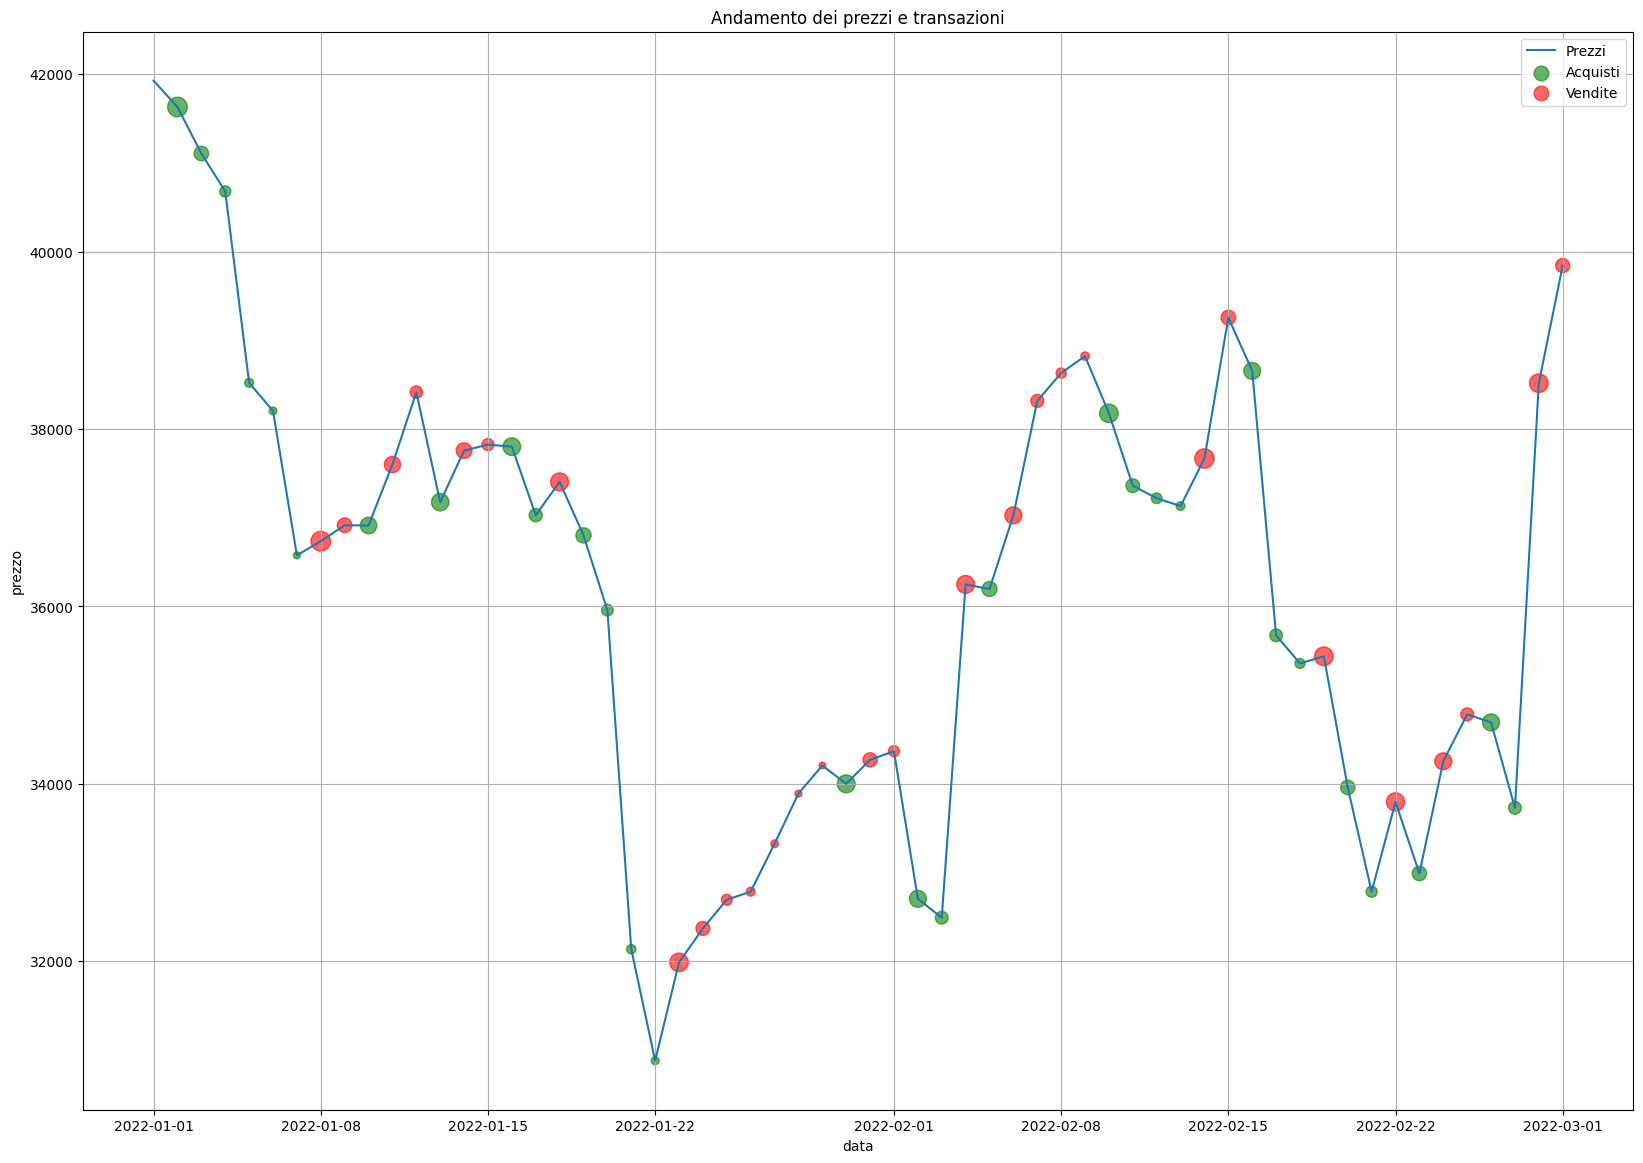

In [427]:
etichette = False

# Preparazione dei dati per il grafico
acquisti = df_transazioni[df_transazioni['azione'].isin(['Acquisto'])]
vendite = df_transazioni[df_transazioni['azione'].isin(['Vendita'])]

# Calcolo delle dimensioni dei punti
max_acquisto = acquisti['quantità_euro'].max()
max_vendita = vendite['quantità_euro'].max()

def calcola_dimensione(quantita, max_quantita, min_size=20, max_size=200):
    return min_size + (max_size - min_size) * (quantita / max_quantita)

dimensioni_acquisti = acquisti['quantità_euro'].apply(lambda x: calcola_dimensione(x, max_acquisto))
dimensioni_vendite = vendite['quantità_euro'].apply(lambda x: calcola_dimensione(x, max_vendita))

# Creazione del grafico
plt.figure(figsize=(20, 14))
plt.grid()
plt.plot(dati['Timestamp'], dati['Price'], label='Prezzi')
if not acquisti.empty:
    plt.scatter(acquisti['data'], acquisti['prezzo'], s=dimensioni_acquisti, color='green', alpha=0.6, label='Acquisti')
    if etichette:
        for i, row in acquisti.iterrows():
            plt.text(row['data'], row['prezzo'], f"+{row['quantità_euro']:.2f} €", 
                     color='black', ha='center', va='bottom')
if not vendite.empty:
    plt.scatter(vendite['data'], vendite['prezzo'], s=dimensioni_vendite, color='red', alpha=0.6, label='Vendite')
    if etichette:
        for i, row in vendite.iterrows():
            plt.text(row['data'], row['prezzo'], f"-{row['quantità_euro']:.2f} €", 
                     color='black', ha='center', va='top')

plt.xlabel('data')
plt.ylabel('prezzo')
plt.title('Andamento dei prezzi e transazioni')
plt.legend()
plt.show()

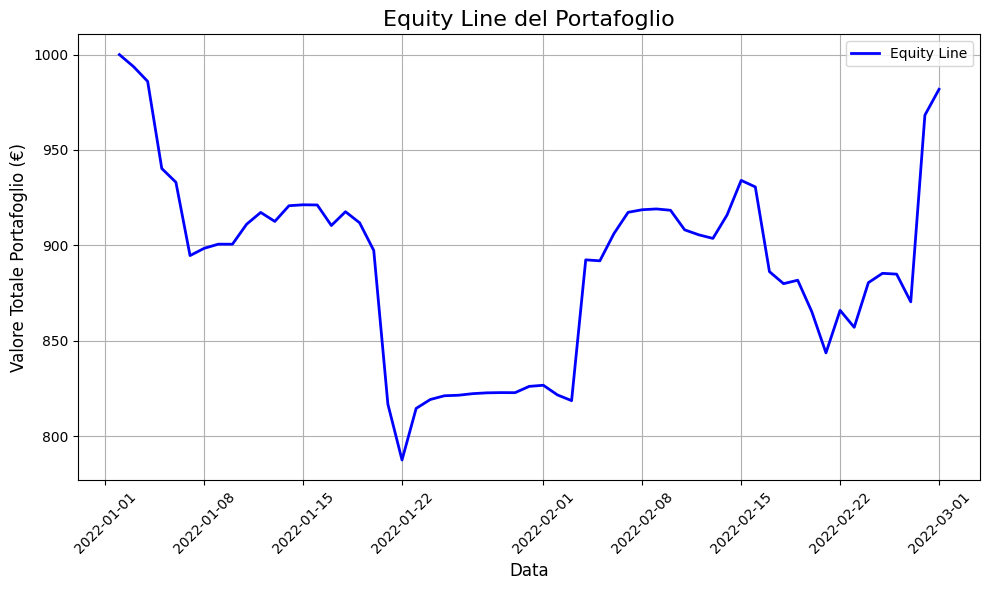

In [434]:
# Assicurati che la colonna 'Data' sia in formato datetime
df_transazioni['data'] = pd.to_datetime(df_transazioni['data'])

# Crea il plot dell'equity line
plt.figure(figsize=(10, 6))
plt.plot(df_transazioni['data'], df_transazioni['valore_totale_portafoglio'], label='Equity Line', color='b', linewidth=2)

# Aggiungi titolo e etichette agli assi
plt.title('Equity Line del Portafoglio', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valore Totale Portafoglio (€)', fontsize=12)

# Aggiungi una griglia per una migliore leggibilità
plt.grid(True)

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per migliore leggibilità
plt.tight_layout()  # Migliora il layout del grafico
plt.show()

In [429]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi, min_acquisto, min_vendita, perc_commissione_acquisto, perc_commissione_vendita):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
            bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
            bitcoin += bitcoin_acquistati
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i + 1] and comprato and bitcoin * lista_prezzi[i] >= min_vendita:
            capitale_vendita = bitcoin * lista_prezzi[i] * (1 - perc_commissione_vendita)
            capitale += capitale_vendita
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato and bitcoin * lista_prezzi.iloc[-1] >= min_vendita:
        capitale += bitcoin * lista_prezzi.iloc[-1] * (1 - perc_commissione_vendita)
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

In [430]:
rendimento_ideale, portafoglio_finale_ideale = calcola_rendimento_portafoglio_ideale(liquidita_iniziale, bitcoin_iniziali, dati['Price'], 0, 0, 0, 0)
print('Rendimento ideale:', rendimento_ideale)
print('Portafoglio finale ideale in euro:', portafoglio_finale_ideale)

Rendimento ideale: 1.9680175957673036
Portafoglio finale ideale in euro: 1968.0175957673036


In [431]:
valore_iniziale = df_transazioni['valore_totale_portafoglio'].iloc[0]
valore_finale = df_transazioni['valore_totale_portafoglio'].iloc[-1]
rendimento = valore_finale / valore_iniziale

In [432]:
print(f"Rendimento del portafoglio: {rendimento}")
print(f'Punteggio rendimento: {round(rendimento / rendimento_ideale *100, 2)}%')
print(f"Valore finale del portafoglio in euro: {df_transazioni['valore_totale_portafoglio'].iloc[-1]}")

Rendimento del portafoglio: 0.9818108189756087
Punteggio rendimento: 49.89%
Valore finale del portafoglio in euro: 981.8108189756088


In [433]:
# Colonna per tracciare il valore delle transazioni (profitto o perdita)
df_transazioni['transaction_value'] = 0.0

# Variabili per tracciare l'acquisto totale accumulato
total_quantity = 0  # Quantità complessiva acquistata
total_cost = 0  # Costo totale di acquisto

# Ciclo per aggiornare la colonna transaction_value
for i, row in df_transazioni.iterrows():
    if row['azione'] == 'Acquisto':
        # Accumula gli acquisti: aggiorna il costo totale e la quantità
        total_quantity += row['quantità_euro']
        total_cost += row['quantità_euro'] * row['prezzo']
    
    elif row['azione'] == 'Vendita':
        if total_quantity == 0:
            raise ValueError("Stai vendendo senza aver comprato nulla!")
        
        # Calcola il prezzo medio d'acquisto
        avg_acquisto = total_cost / total_quantity
        
        # Calcola il valore della vendita rispetto all'acquisto
        sale_value = row['quantità_euro'] * row['prezzo']
        purchase_cost = row['quantità_euro'] * avg_acquisto
        
        # Calcola il profitto/perdita per questa vendita
        profit_or_loss = sale_value - purchase_cost
        
        # Aggiorna la colonna transaction_value
        df_transazioni.at[i, 'transaction_value'] = profit_or_loss
        
        # Riduci la quantità e il costo totale in base a quanto hai venduto
        total_quantity -= row['quantità_euro']
        total_cost -= purchase_cost

# Mostra il DataFrame con il transaction_value
df_transazioni

,data,prezzo,azione,ultima_azione,percentuale_liquidità_usata,percentuale_token_venduti,quantità_euro,quantità_bitcoin,liquidità_posseduta,bitcoin_posseduti,valore_totale_portafoglio,transaction_value
0,2022-01-02,41629.80,Acquisto,Acquisto,0.50,0.00,500.00,0.01,500.00,0.01,1000.00,0.00
1,2022-01-03,41105.72,Acquisto,Acquisto,0.50,0.00,250.00,0.01,250.00,0.02,993.71,0.00
2,2022-01-04,40677.88,Acquisto,Acquisto,0.50,0.00,125.00,0.00,125.00,0.02,985.96,0.00
3,2022-01-05,38520.27,Acquisto,Acquisto,0.50,0.00,62.50,0.00,62.50,0.02,940.30,0.00
4,2022-01-06,38203.51,Acquisto,Acquisto,0.50,0.00,31.25,0.00,31.25,0.02,933.08,0.00
5,2022-01-07,36575.90,Acquisto,Acquisto,0.50,0.00,15.62,0.00,15.62,0.02,894.66,0.00
6,2022-01-08,36734.38,Vendita,Vendita,0.00,0.50,441.42,0.01,457.05,0.01,898.47,-1878259.44
7,2022-01-09,36914.77,Vendita,Vendita,0.00,0.50,221.79,0.01,678.84,0.01,900.63,-903716.33
8,2022-01-10,36912.20,Acquisto,Acquisto,0.50,0.00,339.42,0.01,339.42,0.02,900.62,0.00
9,2022-01-11,37599.60,Vendita,Vendita,0.00,0.50,285.83,0.01,625.25,0.01,911.07,-370108.99
